In [ ]:
!pip install pycaret

In [2]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import pycaret
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set_theme()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [7]:
pycaret.anomaly.setup(df, session_id=42, verbose=False, silent=True, n_jobs=-1)

AttributeError: ignored

In [ ]:
    s = setup(df, session_id=42, verbose=False, silent=True, n_jobs=-1)
    model_detect = create_model('knn', fraction = 0.001)
    detect_results = assign_model(model_detect)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Check Missing Values

After checing missing in weather dataset and smart meter dataset:
- After we put the weather data into 15 minutes interval dataframe, there are a lot of NaN valuesthere becuase the weather data is collected 1 hour-interval. So we need to fill forward missing value

15% of sample is missing (7950 values) ==> drop

# Import more dataset

After we check missing value, the meter in buildings (Erdi, Subject, Rearch_health_suandok, Tech)

we decided to import more dataset and select the building that contain less than 25% null values

In [4]:
df_total = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/2_integrated_dataset/weather_meter_1hour.csv',
                       index_col=1, parse_dates=True).drop('Unnamed: 0', 1)
df_total.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,pm10,pm2.5,temp,humid,accba,bundit,female_1,female_2,female_3,female_4,...,subject,rech_suandok,physic_excl,icdi,rech_society,rech_argo,erdi,test_animal,vet,food_indus
Time,,,,,,,,,,,,,,,,,,,,,
2020-02-07 00:00:00,NaN,NaN,NaN,NaN,1250305.79,920899.78,886938.62,718898.37,613868.74,702512.00,...,4129253.63,4595339.78,NaN,228783.52,NaN,53724.34,333785.89,1928848.90,NaN,1328596.86
2020-02-07 01:00:00,NaN,NaN,NaN,NaN,1250324.61,920917.57,886967.17,718924.54,613896.77,702532.61,...,4129321.73,4595382.78,NaN,228793.60,NaN,53726.22,333800.83,1928923.26,NaN,1328677.25
2020-02-07 02:00:00,NaN,NaN,NaN,NaN,1250342.53,920935.04,886995.33,718942.27,613911.94,702548.99,...,4129387.26,4595425.28,NaN,228802.54,NaN,53728.20,333814.78,1928994.18,NaN,1328755.58
2020-02-07 03:00:00,NaN,NaN,NaN,NaN,1250360.83,920952.26,887013.95,718952.96,613923.46,702563.65,...,4129452.03,4595468.29,NaN,228811.90,NaN,53730.15,NaN,1929065.60,NaN,1328833.28
2020-02-07 04:00:00,NaN,NaN,NaN,NaN,NaN,920967.23,887028.99,718961.73,613932.80,702577.09,...,4129512.70,4595508.74,NaN,228821.06,NaN,53732.06,333840.06,1929135.62,NaN,1328911.23


In [7]:
old_art = df_total[['old_art']].copy()
old_art['diff'] = old_art.diff().values

In [8]:
old_art[old_art['diff'] < 0]

,old_art,diff
Time,,
2020-05-18 15:00:00,943871.36,-113.41
2020-10-17 00:00:00,1051735.42,-5328.52
2021-03-06 00:00:00,1132472.06,-3984.77
2021-06-22 00:00:00,1199580.93,-4769.41
2021-07-01 00:00:00,1191192.32,-18238.59


In [9]:
pd.DataFrame({'Null_value_original': df_total.isna().sum(),
              'Percentage(%)': df_total.isna().sum()*100/ len(df_total) }).round(1)

,Null_value_original,Percentage(%)
pm10,737,5.5
pm2.5,737,5.5
temp,788,5.8
humid,737,5.5
accba,5338,39.6
bundit,1732,12.8
female_1,2196,16.3
female_2,2257,16.7
female_3,2839,21.0
female_4,1195,8.9


In [ ]:
fig = plt.figure(figsize=(30,15))
sns.heatmap(df_total.isnull(), cbar=False, cmap="YlGnBu")
plt.title('Missing Values in Weathher and Electricity Consumption Data', size=25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("new_output.png", bbox_inches='tight')

# Missing values from 2020-Feb-07

There are 22 buildings that contain missing values less than 20% of total data from 2020-Feb-07 to 2021-Aug-21

|Residential|Office|
|---------------|----------|
Female_1|bundit
Female_2|csb2_pailom
Female_3|dean_edu
Female_4|food_indus
Female_6|itsc_front
Female_8|language
Male_3|mechanical_2
Male_4|serve_techsci
Male_5|old_art
-|test_animal


### There are 19 building that contain less than 20% null values
### Show the number and percentage of original null values

In [10]:
df_null = pd.DataFrame({'Null_value_original': df_total.isna().sum(),
              'Percentage(%)': df_total.isna().sum()*100/ len(df_total)}
              ).sort_values(by='Percentage(%)')
df_null[df_null['Percentage(%)'] < 20]

,Null_value_original,Percentage(%)
male_4,592,4.388761
female_6,668,4.952183
pm10,737,5.463711
pm2.5,737,5.463711
humid,737,5.463711
temp,788,5.841797
mechanical_2,1151,8.532879
old_art,1189,8.814590
female_4,1195,8.859070
scb2_pailom,1231,9.125954


# Select buildings that contain fewer than 20% null values !!!!

In [11]:
name_less_20 = ['pm10', 'pm2.5', 'temp', 'humid', 'female_1','female_2','female_4','female_6','female_8','male_3','male_4','male_5',
                'bundit', 'dean_edu','food_indus','itsc_front','language','mechanical_2','old_art',
                'rech_cmu','scb2_pailom','serve_techsci','test_animal']
df_null_less20 = df_total[name_less_20].copy()
df_null_less20.columns = name_less_20

In [ ]:
# fig = plt.figure(figsize=(30,15))
# sns.heatmap(df_null_less20.isnull(), cbar=False, cmap="YlGnBu")
# plt.title('Missing Values in Weathher and Electricity Consumption Data (less than 20%)', size=20)
# plt.xticks(fontsize=12, rotation=90)
# plt.xlabel('column names',fontsize=15)
# plt.yticks(fontsize=12)
# plt.savefig("new_output.png")

# Descritive Statistics

### Problems !!!

- The smart meter dataset contain extreme value (+infinity, -infinity, 0,)

- Data from smart meter must be cumulative and cannot be 0

| Columns name | Problems |
|-----------|----------|
|Female_6| 0, +infinity|
|dean_edu|  +infinity|
|food_indus|  +infinity, -infinity|
|test_animal|  +infinity, -infinity|

Therefore, we need to deal with the extreme value

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
#df_null_less20.describe().T

In [ ]:
weather_units = ['µg/m³', 'µg/m³', 'Celsuis', '%']
fig, axes = plt.subplots(2,2,figsize=(12,6))
for i,ax in enumerate(axes.flat):
  ax.plot(df_null_less20.index,df_null_less20.iloc[:, i])
  
  #------------ assign ticks and title ------------------
  ax.set_ylabel(weather_units[i], size=10)
  ax.set_title(df_null_less20.columns[i], size=14)
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, size=8)
  plt.setp(ax.yaxis.get_majorticklabels(), size=8)
fig.tight_layout()
fig.suptitle(f'Raw Weather Data Plots', size=22, y=1.05)
plt.show()

In [12]:
def elec_plot(df, title='tittle', unit='power10'):
  fig, axes = plt.subplots(5,4,figsize=(20,12))
  for i,ax in enumerate(axes.flat):
    if i == 19:break
    else:
      #------------plot each column------------------
      ax.plot(df.index,df.iloc[:, i])
      
      if unit=='power10':
        #------------ytick power of 10 ------------------
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_scientific(True) 
        formatter.set_powerlimits((-1,1)) 
        ax.yaxis.set_major_formatter(formatter)
      else: pass

      #------------ assign ticks and title ------------------
      ax.set_ylabel('kWh', size=9)
      ax.set_title(df.columns[i], size=14)
      plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, size=7.5)

  plt.axis('off')
  fig.tight_layout()
  fig.suptitle(title, size=25, y=1.1)
  plt.show()

#---------------Assign Nan to Extreme Energy Consumption-------------------
def nan_extreme(data):
    df = data.copy()
    for col in df.columns:
      my_list = df[col].values
      threshold = 1000 # 1000 kWh
      for i, value in enumerate(my_list):
          if (i == 0) | (value == np.nan): pass
          elif (value > 10000000) | (value <= 0) | (value < my_list[i-1]) | (value - my_list[i-1] > threshold):
              my_list[i] = np.nan
          else: pass
      df[col] = my_list
    return df

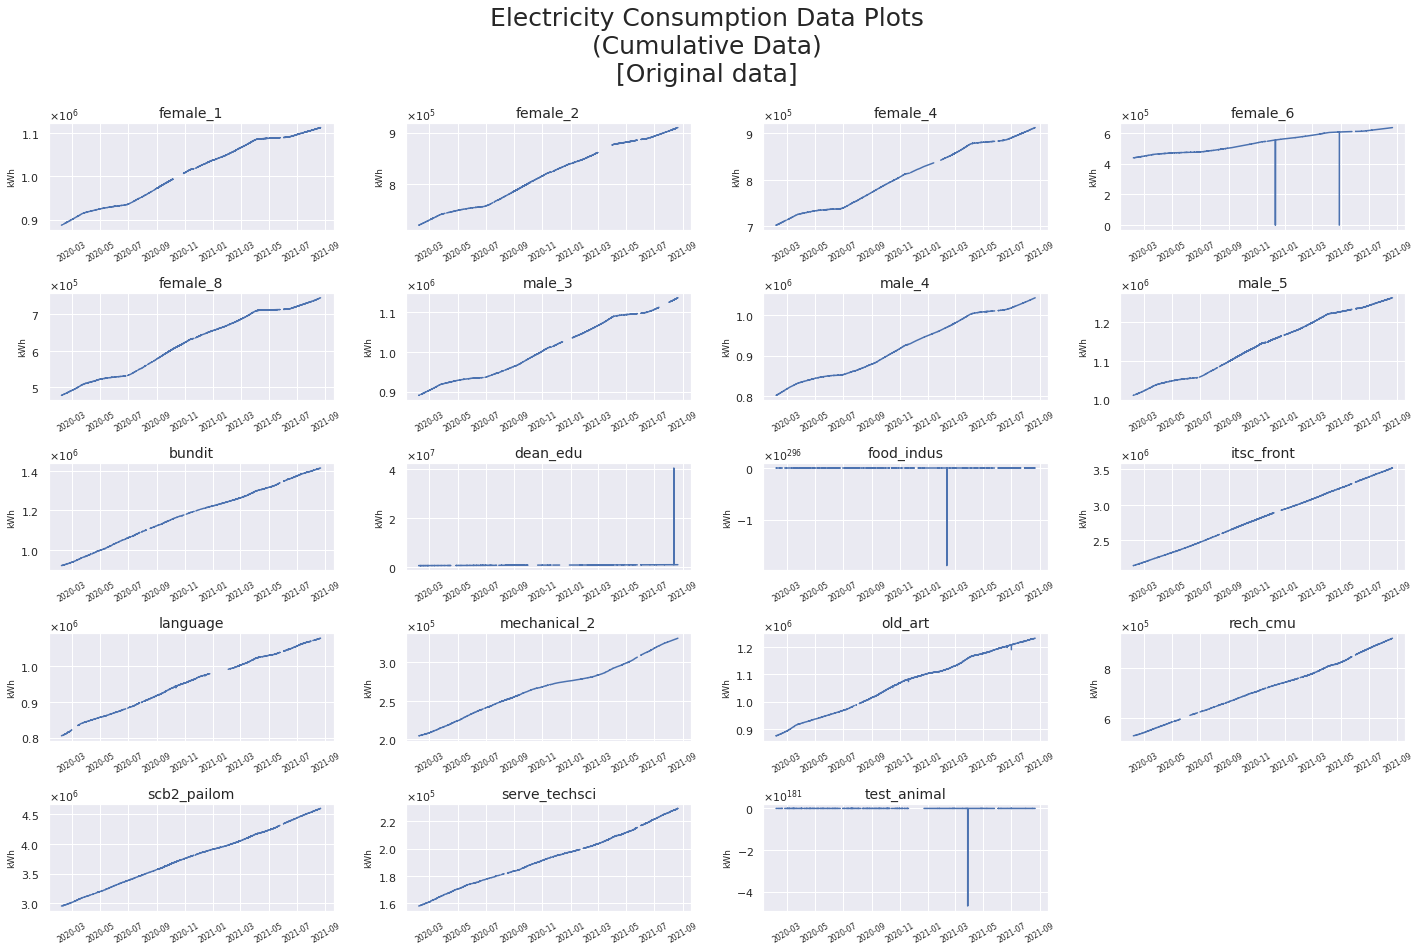

In [13]:
elect = df_null_less20.iloc[:, 4:].copy()
elec_plot(elect, 'Electricity Consumption Data Plots\n(Cumulative Data)\n[Original data]', unit='power10')

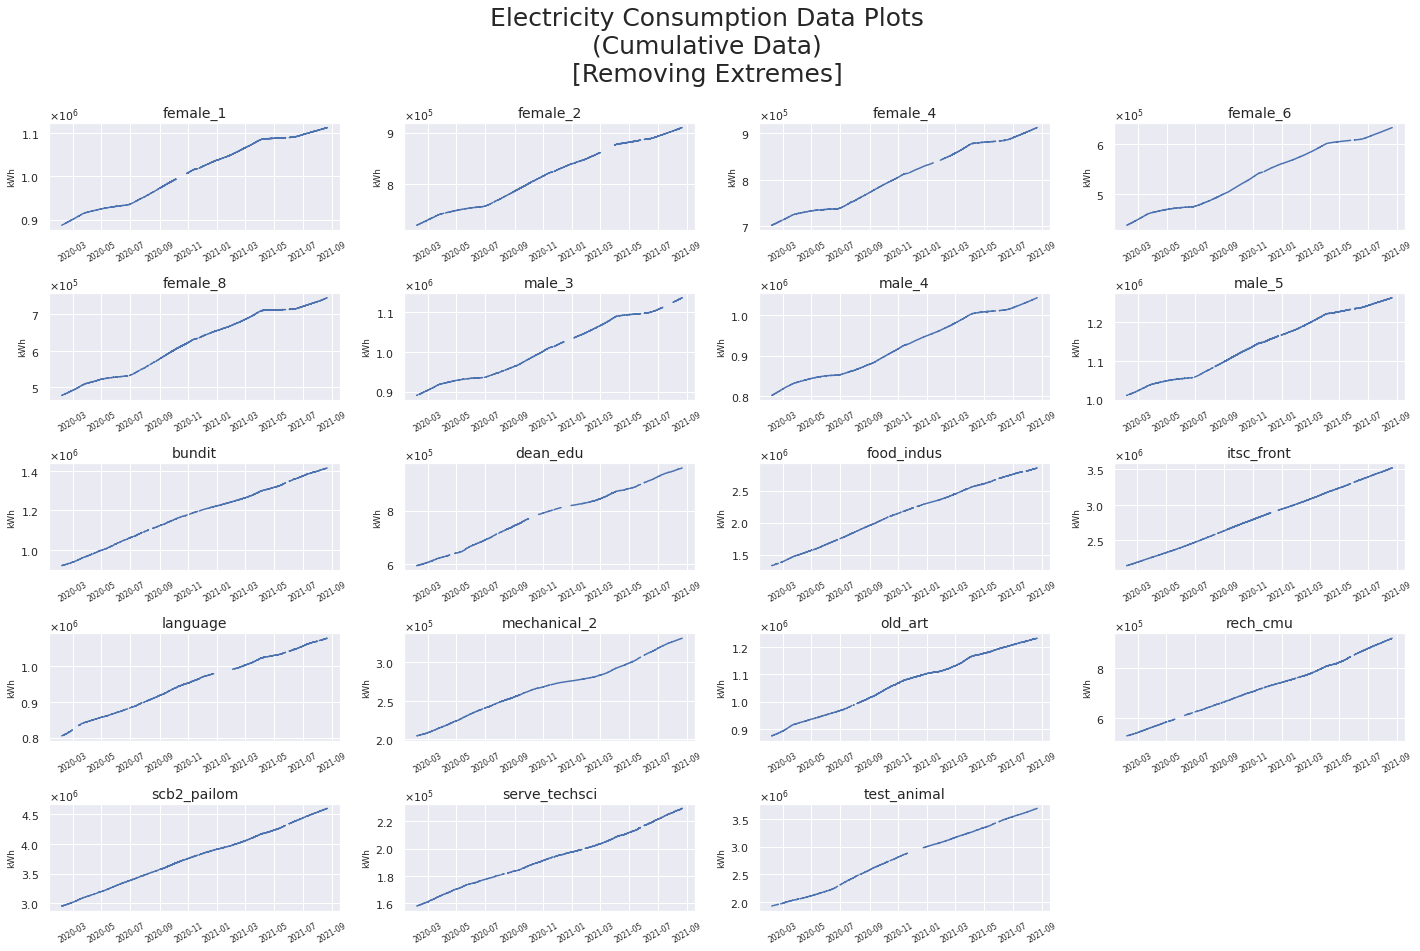

In [14]:
remove_extreme = nan_extreme(elect)
elec_plot(remove_extreme, 'Electricity Consumption Data Plots\n(Cumulative Data)\n[Removing Extremes]', unit='power10')

In [ ]:
female_1 = remove_extreme[['female_1']].copy()
female_1['subtract i-1'] = remove_extreme[['female_1']].diff().values
female_1.iloc[:10, :]

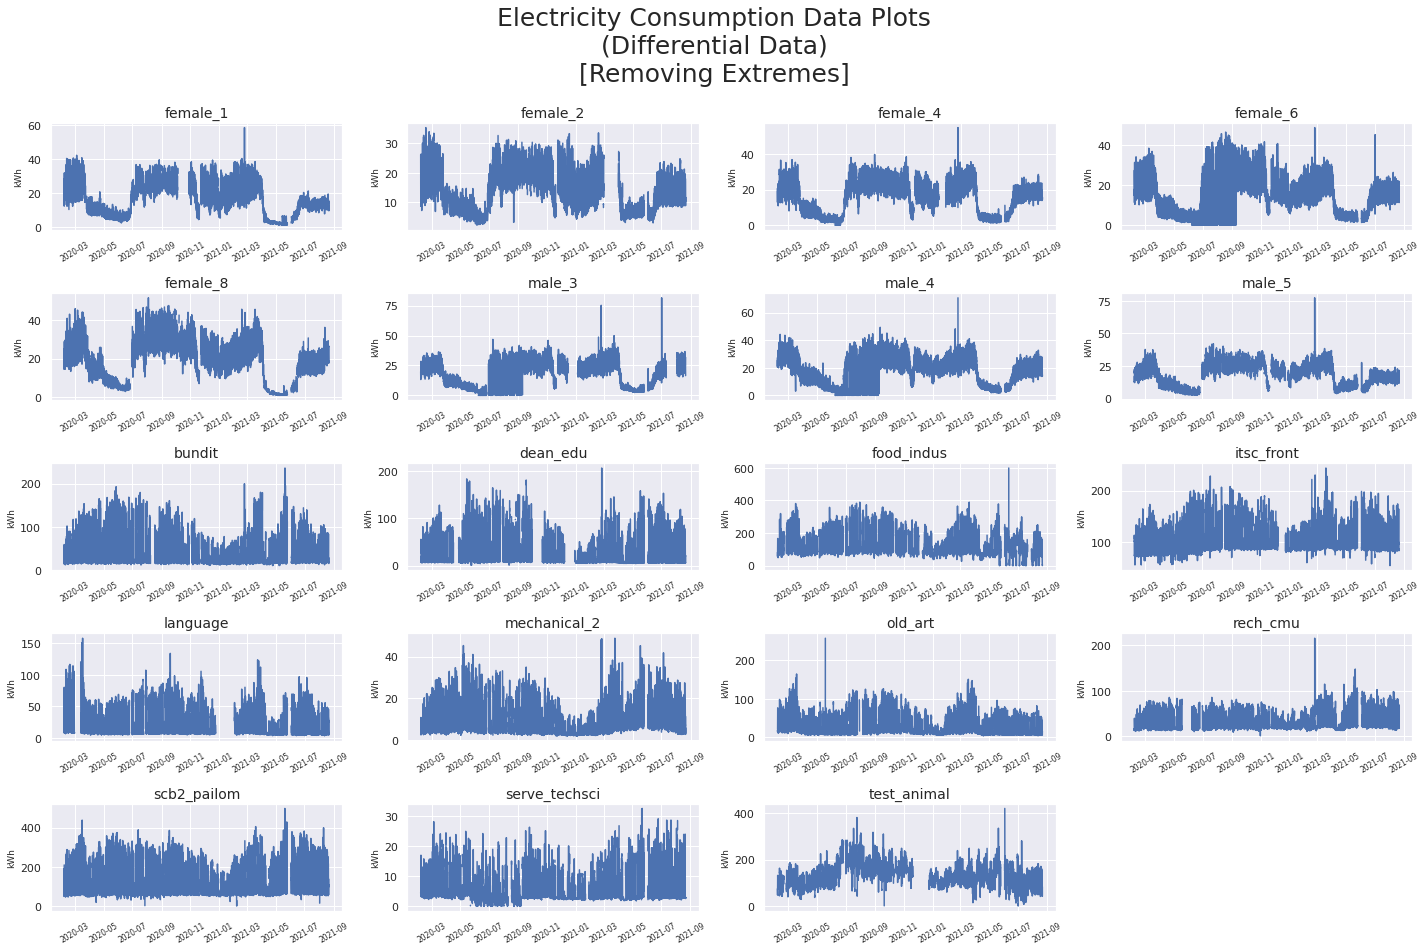

In [15]:
df_remove_extreme = remove_extreme.diff()
elec_plot(df_remove_extreme, 'Electricity Consumption Data Plots\n(Differential Data)\n[Removing Extremes]', unit='normal')

In [ ]:
df_remove_outlier = pd.DataFrame()
fig, axes = plt.subplots(5,4,figsize=(20,12))
for n_col,ax in enumerate(axes.flat):
  if n_col == 19:break
  else:
    df = pd.DataFrame(df_remove_extreme.iloc[:,n_col]).copy()
    name = df.columns[0]
    df['hour'] = [i.hour for i in df.index]
    df['day'] = [i.day for i in df.index]
    df['day_name'] = [i.day_name() for i in df.index]
    df['month'] = [i.month for i in df.index]
    df['week_of_year'] = [i.weekofyear for i in df.index]
    df['is_weekday'] = ['Weekend' if i.day_name() in ['Saturday', 'Sunday'] else 'Weekday' for i in df.index]
    s = setup(df, session_id=42, verbose=False, silent=True, n_jobs=-1)
    model_detect = create_model('knn', fraction = 0.001)
    detect_results = assign_model(model_detect)
    detect_date = detect_results[detect_results['Anomaly'] == 1].index
    detect_value = detect_results[name][detect_results['Anomaly'] == 1].values
    df_nan_outlier = detect_results.copy()
    df_nan_outlier.loc[detect_date, name] = np.nan
    df_remove_outlier[name] = df_nan_outlier.loc[:,name]

    #------------plot each column------------------
    ax.plot(detect_results.index, detect_results[name].values)
    ax.scatter(detect_date, detect_value, color='red', zorder=3, alpha=0.6, s=12)
    #------------ assign ticks and title ------------------
    ax.set_ylabel('kWh', size=9)
    ax.set_title(name, size=14)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, size=7.5)

plt.axis('off')
fig.tight_layout()
fig.suptitle('Electricity Consumption Data Plots\n(Differential Data)\n[Outlier Detection]', size=25, y=1.1)
plt.show()

In [ ]:
elec_plot(df_remove_outlier, 'Electricity Consumption Data Plots\n(Differential Data)\n[Removing Outliers]', unit='normal')

In [ ]:
cumu_nan = elect.isna().sum()
diff_nan = elect.diff().isna().sum()
extreme_nan = df_remove_extreme.isna().sum()
outlier_nan = df_remove_outlier.isna().sum()
n_rows = len(elect) # 13489 rows

df_nan = pd.DataFrame(cumu_nan, columns=['Cumulative NaN(nb)'])
df_nan['Original NaN(%)'] = [str(np.around(num*100,1))+'%' for num in cumu_nan / n_rows]
df_nan['Differential NaN(nb)'] = diff_nan - cumu_nan # ['+' + str(num) for num in (diff_nan - cumu_nan)]
df_nan['Extreme NaN(nb)'] = extreme_nan - diff_nan # ['+' + str(num) for num in extreme_nan - diff_nan]
df_nan['Outlier NaN(nb)'] =  outlier_nan - extreme_nan #['+' + str(num) for num in outlier_nan - extreme_nan]
df_nan['Final NaN(%)'] = [str(np.around(num*100,1))+'%' for num in outlier_nan / n_rows]
df_nan

In [ ]:
df_total

In [ ]:
weather = df_null_less20.iloc[:, :4].copy()
df_total  = pd.concat([weather, df_remove_outlier], axis=1)
df_imputed = df_total.interpolate(method='linear')
weather_units = ['µg/m³', 'µg/m³', 'Celsuis', '%']

fig, axes = plt.subplots(6,4,figsize=(20,15))
for i,ax in enumerate(axes.flat):
  if i == 23:break
  else:
    #------------plot each column------------------
    ax.plot(df_imputed.index, df_imputed.iloc[:, i])

    #------------ assign ticks and title ------------------
    if i < 4:
      ax.set_ylabel(weather_units[i], size=10)   
    else:
      ax.set_ylabel('kWh', size=9)
    ax.set_title(df_imputed.columns[i], size=14)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, size=7.5)

plt.axis('off')
fig.tight_layout()
fig.suptitle('Weather and Electricity Consumption Data Plots\n(Differential Data)\n[Linear Imputation]', size=25, y=1.1)
plt.show()

In [ ]:
df_completed = df_imputed.bfill()
#df_completed

In [ ]:
df_completed.to_csv('/content/drive/MyDrive/Colab Notebooks/IS project/2_integrated_dataset/weather_meter_cleaned.csv')